In [1]:
from matdeeplearn.common import data
import os
import torch
import matplotlib.pyplot as plt
import numpy
from pprint import pprint

%pprint
%load_ext autoreload
%autoreload 2

/global/homes/s/sidnb13/.conda/envs/matdeeplearn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Pretty printing has been turned OFF


In [2]:
dataset = data.get_dataset("/global/cfs/projectdirs/m3641/Shared/Materials_datasets/hMOF/raw_5k/")

In [3]:
print(dataset.num_edge_features)
print(dataset.num_node_features)

50
152


In [4]:
dim = 100
feats = dataset.num_features - (dataset.num_edge_features % dim)
scale_factor = (feats * 100) / (dim * 17)
print(scale_factor)

6.0


In [5]:
print(dataset[0].edge_attr.shape)
print(dataset[0].edge_index.shape)

torch.Size([1545, 50])
torch.Size([2, 1545])


In [6]:
dataset[0].z

tensor([ 30,  30,  30,  30,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
          8,   8,   8,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
          6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 1

In [7]:
dataset[0].edge_index

tensor([[  0,   0,   0,  ...,  40,  40,  40],
        [  1,   2,   3,  ..., 136, 237, 238]])

In [8]:
data = dataset[5]

In [9]:
torch.argwhere(data.z > 5).squeeze(1)

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  34,  35,  36,  37,  38,  39,  45,  46,  47,  48,
         49,  50,  56,  57,  58,  59,  60,  61,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141])

In [10]:
row, col = data.edge_index
print(data.x[row], data.x[col])

tensor([[0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        ...,
        [1, 0, 0,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 1, 0]]) tensor([[0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 1, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [11]:
num_atoms = []
num_edges = []
for graph in dataset:
    num_atoms.append(graph.x.shape[0])
    num_edges.append(graph.edge_index.shape[1])

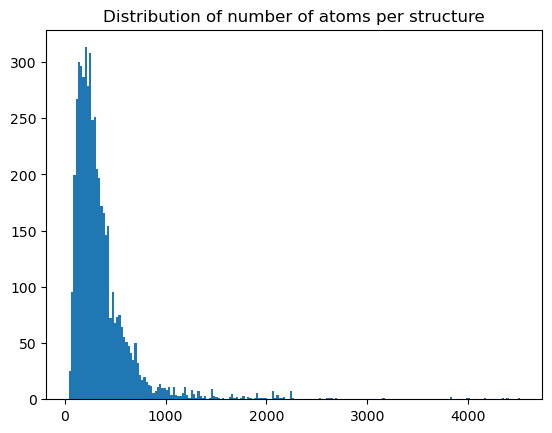

In [12]:
plt.hist(num_atoms, bins=200)
plt.title('Distribution of number of atoms per structure')
plt.show()

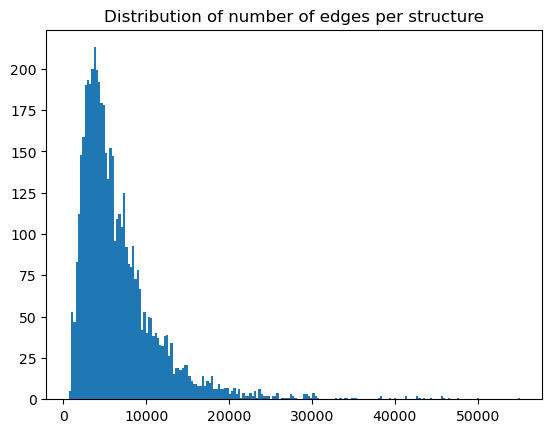

In [13]:
plt.hist(num_edges, 200)
plt.title('Distribution of number of edges per structure')
plt.show()

Prototyping some visualization code

In [14]:
print(dataset[0])
print(dataset[0].cell)

Data(n_atoms=[1], pos=[257, 3], cell=[3, 3], y=[1], z=[257], u=[1, 3], edge_index=[2, 1545], edge_weight=[1545], cell_offsets=[1802, 3], distances=[1545], structure_id=[1], x=[257, 152], edge_attr=[1545, 50])
tensor([[ 1.6626e+01,  0.0000e+00,  0.0000e+00],
        [ 6.8295e-03,  1.6626e+01,  0.0000e+00],
        [-5.9682e-03,  8.8228e-03,  1.6626e+01]])


In [15]:
print(dataset[0].cell)

tensor([[ 1.6626e+01,  0.0000e+00,  0.0000e+00],
        [ 6.8295e-03,  1.6626e+01,  0.0000e+00],
        [-5.9682e-03,  8.8228e-03,  1.6626e+01]])


In [16]:
from torch_geometric.utils import to_dense_adj

# fully connected graph
adj_matrix = to_dense_adj(dataset[0].edge_index, max_num_nodes=dataset[0].num_nodes)
edgewise_distances = dataset[0].distances

print(edgewise_distances)

tensor([3.1695, 3.1695, 3.1695,  ..., 4.7498, 4.4428, 4.9795])


In [17]:
cell_offsets = dataset[0].cell_offsets
print(cell_offsets)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [18]:
print(torch.count_nonzero(torch.count_nonzero(cell_offsets, dim=1)))

tensor(303)


In [19]:
G = nx.from_edgelist(dataset[0].edge_index.T)
nx.draw_networkx_edges(G, pos=nx.spring_layout(G))

NameError: name 'nx' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt